# 1. Business problem

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

Usability
10.00

License
CC0: Public Domain

Expected update frequency
Never

Tags

Business

Banking

E-Commerce Services

Lending


# 2. Explore data

## 2.1. Load data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/mac/Desktop/Project/credit_card/BankChurners.csv'

df = pd.read_csv(path)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.shape

(10127, 23)

## 2.2. Clean data

In [4]:
df_info = pd.DataFrame(df.dtypes,columns = ['Dtypes'])
df_info['unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtypes,unique,Null
CLIENTNUM,int64,10127,0
Attrition_Flag,object,2,0
Customer_Age,int64,45,0
Gender,object,2,0
Dependent_count,int64,6,0
Education_Level,object,7,0
Marital_Status,object,4,0
Income_Category,object,6,0
Card_Category,object,4,0
Months_on_book,int64,44,0


In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


### Dữ liệu credit card được điền đầy đủ 100%, không có giá tri null , không có giá trí lặp lại. Dữ liệu Clientnum không có giá trị để phân loại và có thể bỏ đi được 

In [6]:
df = df.drop('CLIENTNUM',axis = 1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 3. EDA

### 3.1. Categorical column

In [7]:
df_cat = df.select_dtypes(include = 'object')
df_cat.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


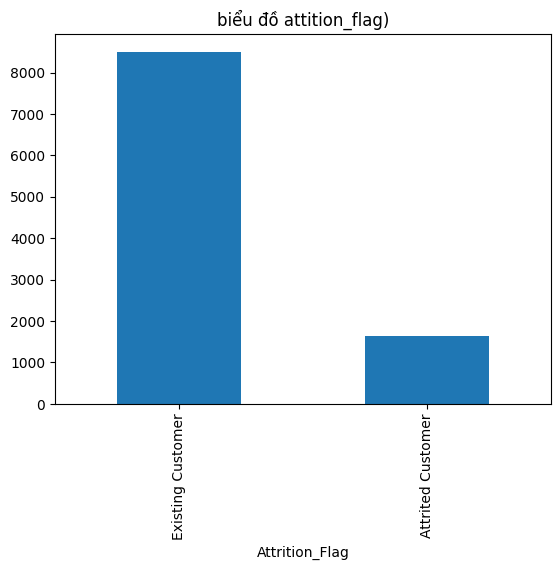

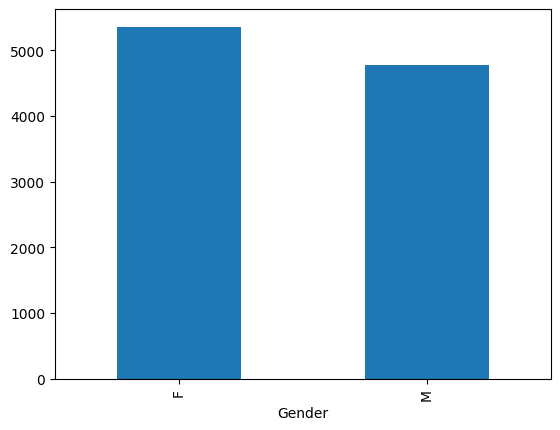

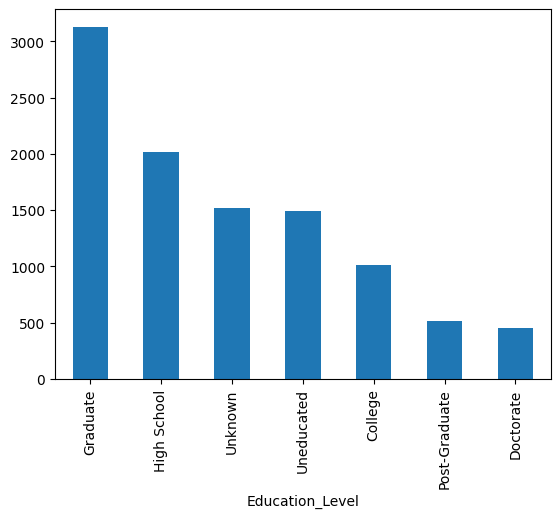

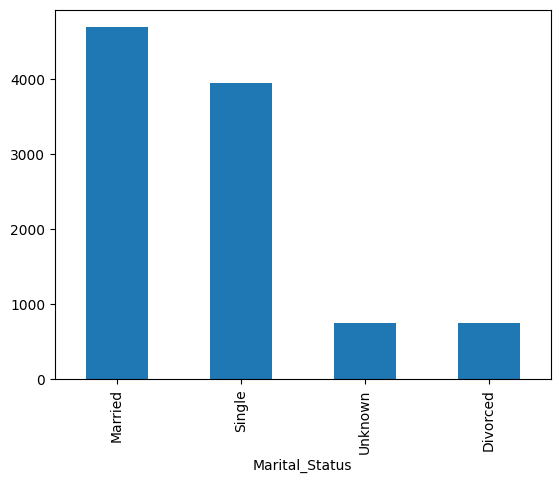

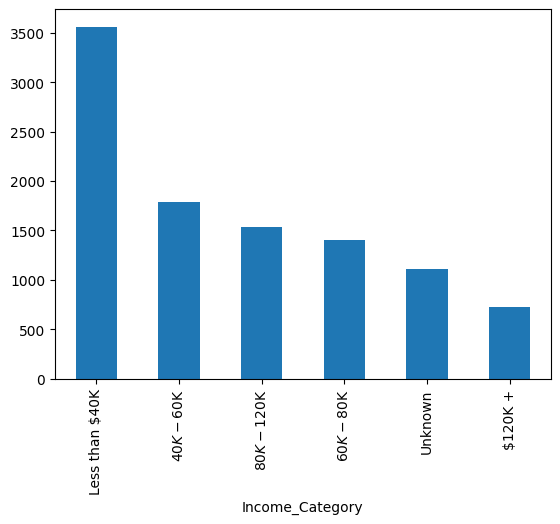

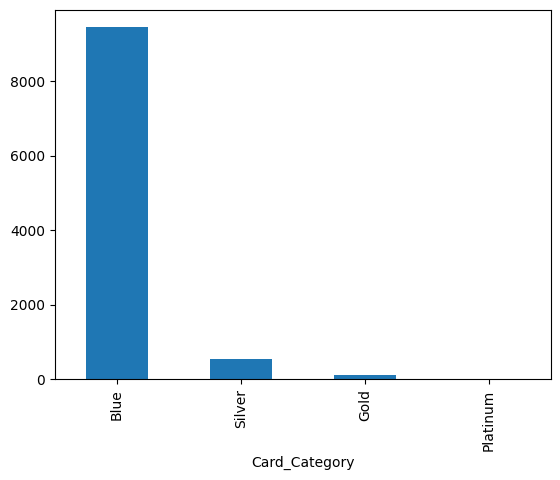

In [8]:
## biểu đồ attrition_flag

a = df['Attrition_Flag'].value_counts()
a.plot(kind = 'bar')
plt.title('biểu đồ attition_flag)')
plt.show()

## biểu đồ gender

b = df['Gender'].value_counts()
b.plot(kind = 'bar')
plt.show()

## biểu đồ education

c = df['Education_Level'].value_counts()
c.plot(kind = 'bar')
plt.show()

## biểu đồ marital

d = df['Marital_Status'].value_counts()
d.plot(kind = 'bar')
plt.show()

## biểu đồ income

e = df['Income_Category'].value_counts()
e.plot(kind = 'bar')
plt.show()

## biểu đồ card

f = df['Card_Category'].value_counts()
f.plot(kind = 'bar')
plt.show()

### Note
- Rõ ràng tập ở lai sử dụng nhiều hơn rất nhiều so với tập rời bỏ. Có thể thấy việc sử dụng thẻ tin dụng chi tiêu như một thói quen.
- Trong đó thói quen sử dụng nhiều hơn đến từ phụ nữ nhưng nam giới dùng thẻ tin dụng là tương đối nhiều. Có thể thấy dù là đàn ông hay phụ nữ đều có thói quen sử dụng thẻ tín dụng và là một thói quen chi tiêu trước và trả tiền sau
- Những người có gia đình chi tiêu và sử dụng nhiều hơn nhưng người độc thân. Những người sử dụng thẻ tín dụng này thuộc tầng lớp đã tốt nghiệp và chi tiêu nhiều ở mức nhỏ hơn 40 nghìn đô. 
- Nhưng người thuộc khảo sát này có mức thu nhập ở mức Blue có tỷ trọng rất cao

->> Có thể hiểu tập khách hàng này thuộc độ tuổi còn trẻ đang độ tuổi chi tiêu cho bản thân và gia đình nhiều nhất và thành thói quyên chi tiêu trước và trả tiền sau

## 3.2. Numeric column

In [9]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [10]:
numeric = df.select_dtypes(include = ['int64','float64'])
numeric.head()                         


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [11]:
new_names = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naie_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_2'}
numeric = numeric.rename(columns=new_names)

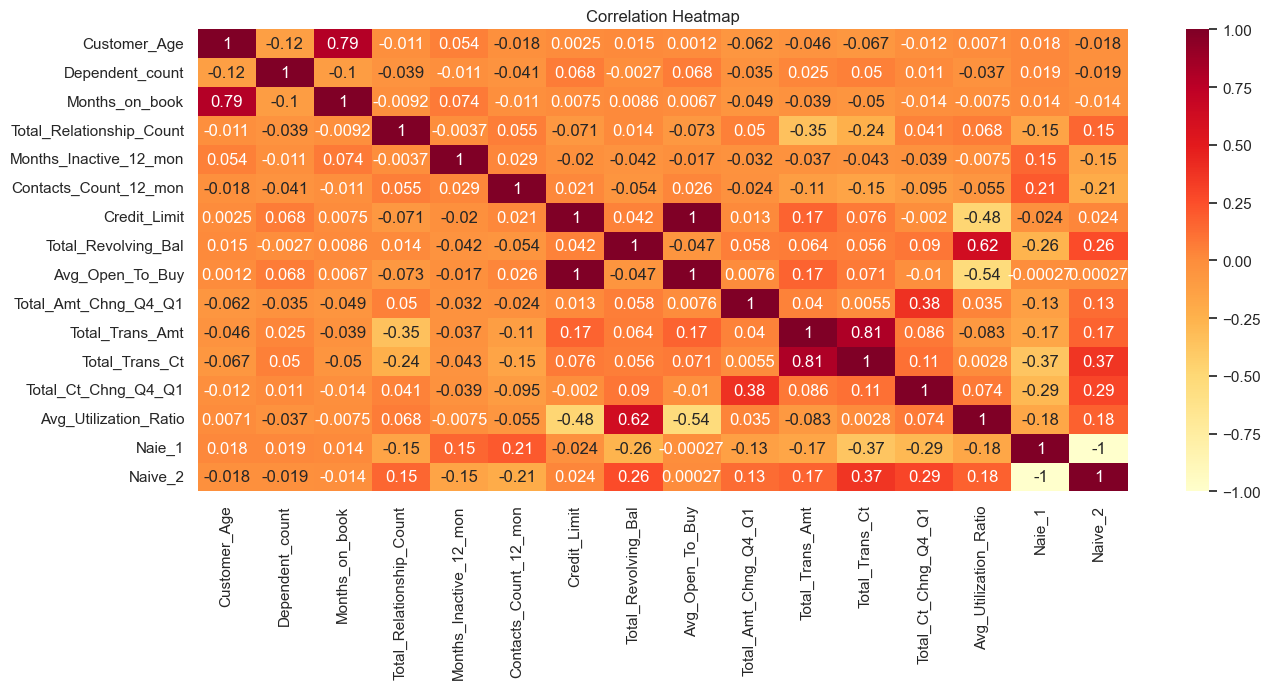

In [12]:
## tạo biểu đồ heatmap xem độ tương quan

corr_matrix = numeric.corr()

#vẽ
sns.set(rc={'figure.figsize': (15, 6)})
sns.heatmap(corr_matrix,annot= True, cmap='YlOrRd',vmin=-1, vmax=1, # Giới hạn giá trị
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

Note:
    
1. Biến Months_on_book và biến customer_age có tương quan dương mạnh. khi months_on_book tăng thì biến customer_age tăng và ngược lại

2. Tương tự như hai biến ở trên, có biến total_trans_ct và total_trans_amt tương quan dương mạnh.

3. Biến Avg_open_to_buy tương quan hoàn hảo với biến credit_limit, có thể bỏ 1 trong hai biến

4. Biến avg_utilization_ratio tương quan nghịch với biến avg_open_to_buy. nghĩa là khi biến avg_utilization_ratio tăng thì biến avg_open_to_buy giảm

In [12]:
numeric.shape

(10127, 16)

In [13]:
# bỏ trường thông tin Avg_open_to_buy

numeric = numeric.drop(columns=['Avg_Open_To_Buy'])

### 3.3. DATA PREPROCESSING

Trong bước tiền xử lý dữ liệu, dữ liệu sẽ được chuẩn bị để dùng thuật toán Kmean. Bước chia cụm rất quan trọng,
tất cả các tính năng sẽ đều đóng góp như nhau vào quá trình phân cụm và ngăn chặn các biến có quy mô lớn hơn chiếm ưu thế trong phân tích.

In [15]:
numeric.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naie_1,Naive_2
0,45,3,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,49,5,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,51,3,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,40,4,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,40,3,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [16]:
one_hot_cols = [
    "Gender", 
    "Education_Level", 
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Dependent_count",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Attrition_Flag",
]

standard_cols = [
    "Customer_Age", 
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Months_on_book"
]

power_cols = [
    "Total_Revolving_Bal",
    "Credit_Limit",
    "Avg_Utilization_Ratio",
]

minmax_cols = [
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal",
]

In [17]:
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

preprocessing.fit_transform(df)

array([[ 0.        ,  1.        ,  0.        , ..., -0.00376821,
         0.9627821 , -0.76802697],
       [ 1.        ,  0.        ,  0.        , ...,  0.07621399,
         0.56651214, -0.4973663 ],
       [ 0.        ,  1.        ,  0.        , ..., -1.66614912,
        -0.41695274, -1.20167778],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.66614912,
         0.12593946, -1.20167778],
       [ 0.        ,  1.        ,  0.        , ..., -1.66614912,
         0.09934984, -1.20167778],
       [ 1.        ,  0.        ,  0.        , ...,  0.8288798 ,
         0.78431193, -0.0589959 ]])

In [18]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

df_scaled.head()

,one-hot__Gender_F,one-hot__Gender_M,one-hot__Education_Level_College,one-hot__Education_Level_Doctorate,one-hot__Education_Level_Graduate,one-hot__Education_Level_High School,one-hot__Education_Level_Post-Graduate,one-hot__Education_Level_Uneducated,one-hot__Education_Level_Unknown,one-hot__Marital_Status_Divorced,...,standard__Customer_Age,standard__Total_Amt_Chng_Q4_Q1,standard__Total_Ct_Chng_Q4_Q1,standard__Months_on_book,minmax__Total_Trans_Amt,minmax__Total_Trans_Ct,minmax__Total_Revolving_Bal,power__Total_Revolving_Bal,power__Credit_Limit,power__Avg_Utilization_Ratio
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.165406,2.623494,3.834003,0.384621,0.035273,0.248062,0.308701,-0.003768,0.962782,-0.768027
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.333570,3.563293,12.608573,1.010715,0.043452,0.178295,0.343266,0.076214,0.566512,-0.497366
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.583058,8.367214,6.807864,0.008965,0.076611,0.077519,0.000000,-1.666149,-0.416953,-1.201678
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.789126,2.942843,6.807864,-0.241473,0.036775,0.077519,1.000000,1.114008,-0.456520,1.484731
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.789126,6.455682,7.509325,-1.869317,0.017025,0.139535,0.000000,-1.666149,-0.028788,-1.201678


In [19]:
# Filtering only numeric columns for comparison.
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith("one")]
scaled_columns_not_one_hot

Index(['standard__Customer_Age', 'standard__Total_Amt_Chng_Q4_Q1',
       'standard__Total_Ct_Chng_Q4_Q1', 'standard__Months_on_book',
       'minmax__Total_Trans_Amt', 'minmax__Total_Trans_Ct',
       'minmax__Total_Revolving_Bal', 'power__Total_Revolving_Bal',
       'power__Credit_Limit', 'power__Avg_Utilization_Ratio'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

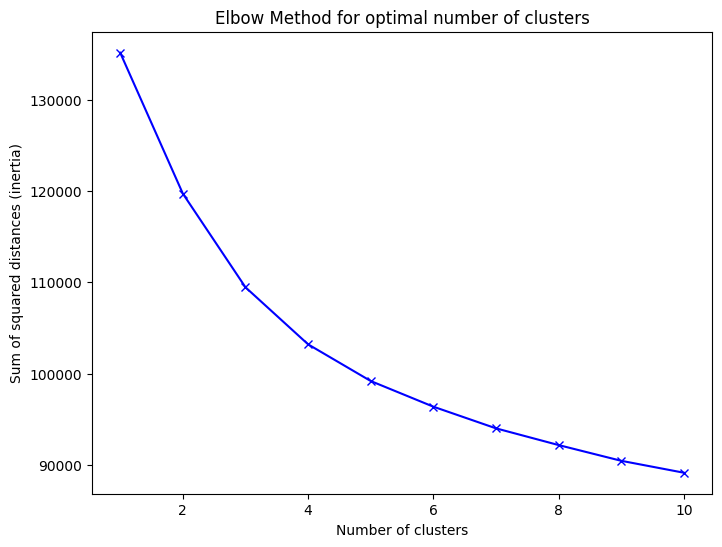

In [19]:

from sklearn.cluster import KMeans

# Giả sử df_scaled là dữ liệu đã được chuẩn hóa
range_n_clusters = range(1, 11)
inertias = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (inertia)')
plt.title('Elbow Method for optimal number of clusters')
plt.show()

Dựa vào biểu đồ Elbowl ta thấy có 3 khúc được xác đinh, ta lấy làm 3 cụm để xét

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Attrition_Flag']),
                                                 ('standard', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Months_on_book']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Revolving_Bal']),
                                                 ('power', PowerTransformer(),
                                                  ['Total_Revolving_Bal',
                                                   'Credit_Limit',
                                                   'Avg_Utilization_Ratio'])])),
                ('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [21]:
# New df with "Cluster" column
df_clustered = df.copy()
df_clustered["Cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,1
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,1
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,1
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,1
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,1


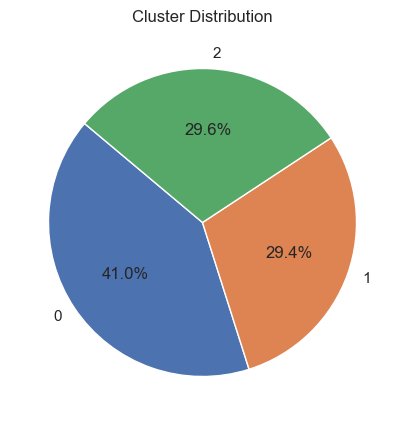

In [25]:
# Count of each cluster
cluster_counts = df_clustered["Cluster"].value_counts().sort_index()

# Pie Plot
plt.figure(figsize=(5, 5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.show()

In [22]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1
0,0.106130,0.605816
1,2.542056,0.572931
2,0.654461,1.361599
3,3.751093,1.507507
4,0.480782,3.445980


In [25]:
centroids = pipeline["clustering"].cluster_centers_
centroids

array([[-1.40845954,  0.09223166],
       [ 1.06483884,  1.14267108],
       [ 0.89459445, -1.26571671]])

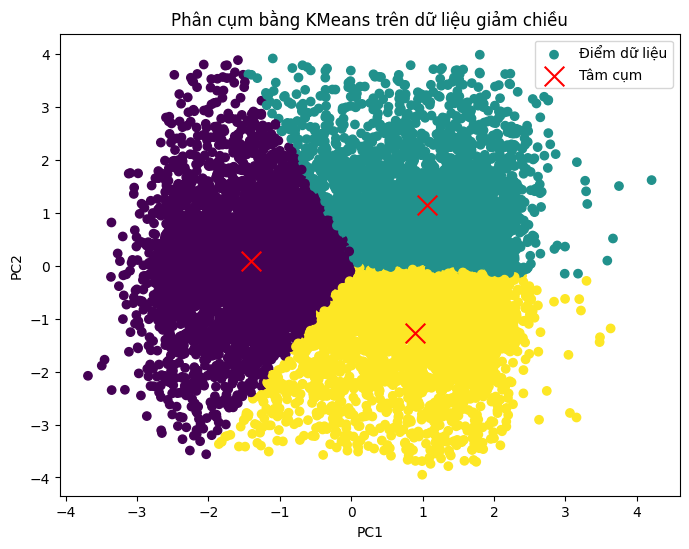

In [27]:
# Vẽ dữ liệu đã được giảm chiều
plt.figure(figsize=(8, 6))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=df_clustered['Cluster'], cmap='viridis')

# Vẽ các tâm cụm
centroids = pipeline["clustering"].cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')

# Thêm các nhãn và tiêu đề
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Phân cụm bằng KMeans trên dữ liệu giảm chiều')
plt.legend(['Điểm dữ liệu', 'Tâm cụm'])
plt.show()

In [28]:
df_clustered.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,1
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,1
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,1
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,1
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,1


In [31]:
df_clustered.dtypes

Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income_Category                                                                                                                        object
Card_C

In [55]:
df_clustered.groupby('Cluster').agg(
    {
        'Customer_Age':'median',
        'Dependent_count':'median',
        'Months_on_book': 'median',
        'Total_Relationship_Count': 'median',
        'Months_Inactive_12_mon': 'median',
        'Contacts_Count_12_mon': 'median',
        'Credit_Limit': 'median',
        'Total_Revolving_Bal': 'median',
        'Avg_Open_To_Buy': 'median',
        'Total_Amt_Chng_Q4_Q1': 'median',
        'Avg_Utilization_Ratio': 'median',        
    }
).round(2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio
Cluster,,,,,,,,,,,
0,46.0,3.0,36.0,4.0,2.0,3.0,9897.0,0.0,9351.0,0.72,0.00
1,40.0,3.0,31.0,4.0,2.0,2.0,3371.0,1591.0,1748.0,0.78,0.44
2,53.0,2.0,42.0,4.0,2.0,2.0,3355.5,1589.5,1712.0,0.72,0.43


# Attention

1. Cụm 0 có độ tuổi phân bố rộng ở tuổi 46 , hầu hết 3 tài khoản thẻ tín dụng. Hạn mức thẻ phổ biến ở mức 9897 (cao nhất trong 3 nhóm) tiềm năng chi tiêu giá trị lớn cũng là giai đoạn độ chín của sự nghiệp và quan tâm đến sản phẩm sức khoẻ. Trung bình một lần mua phổ biến ở mức 9351 (rất cao) chỉ có những sản phẩm có giá trị cao và chất lượng

>>> Ở cụm này, đây là tập khách hàng cần chăm sóc đặc biệt

2. Cụm 1 có độ tuổi phân bố rộng ở khoảng tuổi 40 , hầu hết có 3 tài khoản thẻ tín dụng. Nhóm này sử dụng trong tháng ít hơn 2 nhóm còn lại, hạn mức chỉ cao hơn nhóm 2 và phân bố ở mức 3371, Một lần mua trung bình phân bố ở khoảng 1748. Cụm này thuộc tập khách hàng trước sự thăng hoa của sự nghiệm và chưa chi tiêu nhiều và tần suất cũng ít, có thể coi loại thẻ credit này không phải là thẻ chính của họ.

>>> Ở cụm này, đây là tập khách hàng tiềm năng cần khai thác mạnh

3. Cụm 2 có dộ tuổi phân bố rộng khoảng tuổi 53 , hầu hết có 2 tài khoản thẻ tín dụng, số lần sử dụng trong tháng là 42 lần, hạn mức thẻ phổ biến ở mức 3555 là thấp nhất trong 2 cụm còn lại , trung bình chi tiêu mua trong 1 tháng cũng thấp nhất là 1720. Cụm này nhu cầu sử dụng thẻ cao nhưng chi tiêu rất ít.

>>> Ở cụm này, đây là tập khách hàng đã lớn tuổi và chi tiêu ít nên tập trung tư vấn sản phẩm mua sắm có giá  trị ít